# EDA BASELINE
#DecisionTreeClassifier

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

-------------

## Load in file

In [4]:
data = pd.read_csv('CLEANDATA/clean_data_N2.csv', index_col=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882247 entries, 0 to 882246
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   LIGHTING_CONDITION         882247 non-null  object
 1   CRASH_TYPE                 882247 non-null  object
 2   DAMAGE                     882247 non-null  object
 3   NUM_UNITS                  882247 non-null  int64 
 4   MOST_SEVERE_INJURY         882247 non-null  object
 5   CRASH_HOUR                 882247 non-null  int64 
 6   CRASH_DAY_OF_WEEK          882247 non-null  int64 
 7   CRASH_MONTH                882247 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   882247 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  882247 non-null  object
 10  TRAFFICWAY_TYPE_N          882247 non-null  object
 11  ROAD_DEFECT_N              882247 non-null  object
 12  ROADWAY_SURFACE_COND_N     882247 non-null  object
 13  FIRST_CRASH_TYPE_N         882247 non-null  

In [5]:
data.sample(n=5, random_state=1).T

,597559,330176,472711,643107,829571
LIGHTING_CONDITION,UNKNOWN,DAYLIGHT,DARKNESS,"DARKNESS, LIGHTED ROAD",DAYLIGHT
CRASH_TYPE,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY
DAMAGE,"OVER $1,500","$501 - $1,500","OVER $1,500","OVER $1,500","$501 - $1,500"
NUM_UNITS,2,2,1,2,2
MOST_SEVERE_INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY
CRASH_HOUR,8,9,20,3,8
CRASH_DAY_OF_WEEK,3,4,5,7,4
CRASH_MONTH,8,2,9,11,3
SEC_CONTRIBUTORY_CAUSE_N,DRIVING_EXPERIENCE,RECKLESS_DRIVING,UNKNOWN,DISREGARDING_ROADSIGNS,UNKNOWN
PRIM_CONTRIBUTORY_CAUSE_N,DRIVING_EXPERIENCE,RECKLESS_DRIVING,UNKNOWN,DISREGARDING_ROADSIGNS,RECKLESS_DRIVING


--------

## Baseline Model

In [6]:
columns_to_encode = [
    'LIGHTING_CONDITION', 'CRASH_TYPE', 'DAMAGE', 'MOST_SEVERE_INJURY', 'SEC_CONTRIBUTORY_CAUSE_N', 'PRIM_CONTRIBUTORY_CAUSE_N', 'TRAFFICWAY_TYPE_N', 
    'ROAD_DEFECT_N', 'ROADWAY_SURFACE_COND_N', 'FIRST_CRASH_TYPE_N', 'WEATHER_CONDITION_N', 'TRAFFIC_CONTROL_DEVICE_N', 'DEVICE_CONDITION_N'
]

label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882247 entries, 0 to 882246
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   LIGHTING_CONDITION         882247 non-null  int64
 1   CRASH_TYPE                 882247 non-null  int64
 2   DAMAGE                     882247 non-null  int64
 3   NUM_UNITS                  882247 non-null  int64
 4   MOST_SEVERE_INJURY         882247 non-null  int64
 5   CRASH_HOUR                 882247 non-null  int64
 6   CRASH_DAY_OF_WEEK          882247 non-null  int64
 7   CRASH_MONTH                882247 non-null  int64
 8   SEC_CONTRIBUTORY_CAUSE_N   882247 non-null  int64
 9   PRIM_CONTRIBUTORY_CAUSE_N  882247 non-null  int64
 10  TRAFFICWAY_TYPE_N          882247 non-null  int64
 11  ROAD_DEFECT_N              882247 non-null  int64
 12  ROADWAY_SURFACE_COND_N     882247 non-null  int64
 13  FIRST_CRASH_TYPE_N         882247 non-null  int64
 14  WEAT

### Train Test Split

In [8]:
X = data.drop('DAMAGE', axis=1)
y = data['DAMAGE']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((617572, 16), (264675, 16))

------------------------

In [10]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
model_gini.score(X_train, y_train)

0.915486777250264

In [12]:
model_gini.score(X_test, y_test)

0.5148087276848966

In [13]:
y_pred = model_gini.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.22      0.21     29656
           1       0.31      0.34      0.32     69321
           2       0.68      0.64      0.66    165698

    accuracy                           0.51    264675
   macro avg       0.40      0.40      0.40    264675
weighted avg       0.53      0.51      0.52    264675



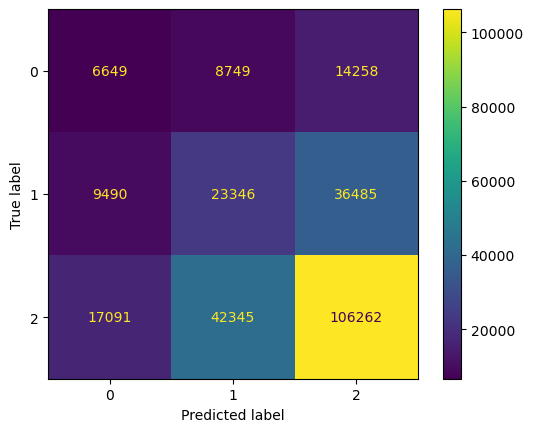

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

-----------------------

In [16]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [17]:
model_entropy.score(X_train, y_train)

0.915486777250264

In [18]:
model_entropy.score(X_test, y_test)

0.5185264947577217

In [19]:
y_pred = model_entropy.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.23      0.21     29656
           1       0.32      0.33      0.32     69321
           2       0.68      0.65      0.66    165698

    accuracy                           0.52    264675
   macro avg       0.40      0.40      0.40    264675
weighted avg       0.53      0.52      0.52    264675



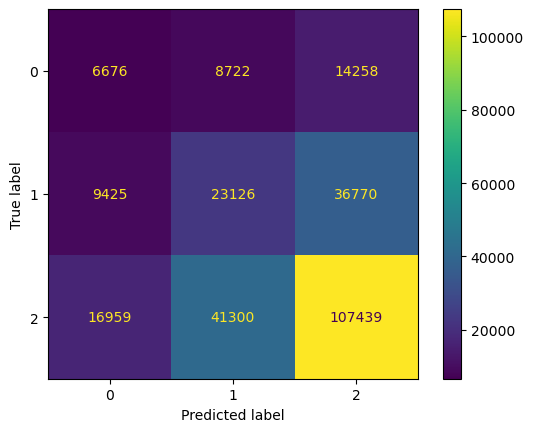

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()